## Group assignment 1: Has the network latency gone up since we switched ISPs?

**$H_0$: "Latency hasn't changed after the switch in ISP."**

**$H_a$: "Latency has changed after the switch in ISP."**


**True Positive**
- $H_0$ is rejected, latency has gone up
- low p-value
- avg latency after the switch is higher than the average latency before the switch


**False Positive**
- $H_0$ is rejected
- low p-value
- a significant difference found in latency prior to and after
- we found the latency prior was lower than our measured, external factors impact latency
- server crash, downloads, many users etc


**False Negative**
- $H_0$ is accepted
- high p-value
- we found the latency to be equal, sampling bias, technology, time of day of test


**True Negative**
- $H_0$ is true
- high p-value
- Latency has stayed the same or gone down

----
## Group assignment 2: Is the website redesign any good?

**$H_0$: "Web traffic has stayed the same."**

**$H_a$: "Web traffic has changed.**


**True Positive**
- low p-value
- $H_0$ is rejected and false
- Traffic has statistically increased significantly

**False Positive**
low p-value
- $H_0$ is rejected and true 
- traffic increased, due to external factors, holiday season

**False Negative**
- high p-value
- $H_0$ is accepted
- traffic looked like it stayed the same, sample size

**True Negative**
- high p-value
- $H_0$ is true, failed to be rejected
- traffic stayed the same

----
## Group assignment 3: Is our TV ad driving more sales?

**$H_0$: "Sales have remained the same after the tv add."**

**$H_a$: "Sales have changed after the tv add."**


**True Positive**
- Ho is rejected and false
- low p-value
- sales has statistically increased, significantly

**False Positive**
- Ho is rejected and true 
- low p-value
- sales increased, due to external factors

**False Negative**

- Ho is accepted
- high p-value
- sales looked like it stayed the same, but they didnt, sample size

**True Negative**
- Ho is true, failed to be rejected
- high p-value
- sales stayed the same, tv ad was a flop

----
### T-test Excercises

**Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.**
    
    Office 1:

    - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

    Office 2:

    - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

- Use a .05 level of significance.


**Load the mpg dataset and use it to answer the following questions:**

  - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
  
  - Are compact cars more fuel-efficient than the average car?


  - Do manual cars get better gas mileage than automatic cars?

In [723]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data

In [724]:
# (focal question) is the average time it takes to sell a home different between the two offices?

# (Goal) compare the mean time of home sell of two (2) groups 
# this will be 2 independent T-tests comparison
# since I am only given the descriptive statistics of the two (2) office groups - i will need to use the "stats.ttest_ind_from_stats()" function

alpha = 0.05

office_1_sample = 40 # number of sales
office_1_mean = 90 # number of days
office_1_std_dev = 15 # number of days

office_2_sample = 50 # number of sales
office_2_mean = 100 # number of days
office_2_std_dev = 20 # number of days

#### Hypothesis Generation

$H_0$: "There's no difference in the average time it takes Office 1 and Office 2 to sell a home."

$H_a$: There is a difference in the average time it takes Office 1 and Office 2 to sell a home."

In [725]:
# comparing sample variances 
office_1_std_dev**2 # where sample var = 225 days squared
office_2_std_dev**2 # where sample var = 400 days squared

400

In [726]:
t_test, p_value = stats.ttest_ind_from_stats(
    office_1_mean, office_1_std_dev, office_1_sample,
    office_2_mean, office_2_std_dev, office_2_sample,
    equal_var=False
)

if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS an average home-sale time difference across both offices.")
else: 
    print(f"FAILED to reject the Null Hypothesis. There is NOT an average home-sale time difference across both offices.")

REJECT the Null Hypothesis. There IS an average home-sale time difference across both offices.


----

In [727]:
mpg_db = data('mpg')

### MPG Dataset Question #1: Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


#### Framing the Scientific Question / Experiment

    Focal Question: Is there a difference in fuel-efficiency in cars from 2008 vs. cars from 1999? 

"Fuel-efficiency" as measured by "total average miles", or said another way: the combined average of cars' city and highway miles.

**Assumptions:**

- Both comparisons are independent of ea. other
- Sample size is > 30 records/observations
- Variances across both samples will be different

----

#### Hypothesis Generation and alpha

**$H_0$:** 
    
- "There is NO difference in fuel-efficiency across vehicles made in 2008 and 1999."

**$H_a$:**

  - "There IS a difference in fuel-effiency across vehicles made in 2008 and 1999."

**Fuel-effiency**:

- as measured by the combined total average of city and highway miles. 

**Where:** (next step)

- lower total_avg_mpg = "less fuel-efficient" and...
- higher total_avg_mpg = "more fuel-efficient"
  
$\alpha$ = 0.05

----

In [728]:
mpg_db.dtypes # whereby city and highway miles are both int type (check: will make it easier to sum and average)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [729]:
mpg_db['year'].unique() # i am able to see that there are only 2 year periods in this dataset (2008 and 1999)

array([1999, 2008])

In [730]:
# creating a new column called "total_avg_mpg"
mpg_db['total_avg_mpg'] = (mpg_db['cty'] + mpg_db['hwy']) / 2

# verifying the results of the newly created column
mpg_db.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total_avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [731]:
# reording the columns to place the information i will be looking at, earlier in the dataframe

column_lst = list(mpg_db.columns.values)
mpg_db = mpg_db[[
    'manufacturer',
    'year',
    'model',
    'cty',
    'hwy',
    'total_avg_mpg',
    'displ',
    'cyl',
    'trans',
    'drv',
    'fl',
    'class'
 ]]

mpg_db.head() # this checks out!

,manufacturer,year,model,cty,hwy,total_avg_mpg,displ,cyl,trans,drv,fl,class
1,audi,1999,a4,18,29,23.5,1.8,4,auto(l5),f,p,compact
2,audi,1999,a4,21,29,25.0,1.8,4,manual(m5),f,p,compact
3,audi,2008,a4,20,31,25.5,2.0,4,manual(m6),f,p,compact
4,audi,2008,a4,21,30,25.5,2.0,4,auto(av),f,p,compact
5,audi,1999,a4,16,26,21.0,2.8,6,auto(l5),f,p,compact


In [732]:
# next, I will conduct some initial analysis that should also help inform my assumptions and help determine the correct method to take for comparing these two (2) car samples

len(mpg_db[mpg_db['year'] == 2008]) # 117 total 2008 vehicles in df
len(mpg_db[mpg_db['year'] == 1999]) # 117 total 1999 vehicles in df

# both samples are > 30 observations
# next i'll calculate the mean and std_deviation for 2008 & 1999 vehicles

117

In [733]:
# calculating mean by vehicle year

round(mpg_db[["year", "total_avg_mpg"]].groupby("year").mean(), 1)
# similar means for both years

,total_avg_mpg
year,
1999,20.2
2008,20.1


In [734]:
# calculating standard deviation by vehicle year

round(mpg_db[["year", "total_avg_mpg"]].groupby("year").std(), 1)
# standard deviation
# 1999	5.2 actual
# 2008	4.9 actual

,total_avg_mpg
year,
1999,5.2
2008,4.9


In [735]:
# let's check the variance

import math
round(mpg_db[["year", "total_avg_mpg"]].groupby("year").var(), 3)

print(math.sqrt(27.1)) # check's out
print(math.sqrt(24.1)) # check's out

5.205766033928148
4.909175083453431


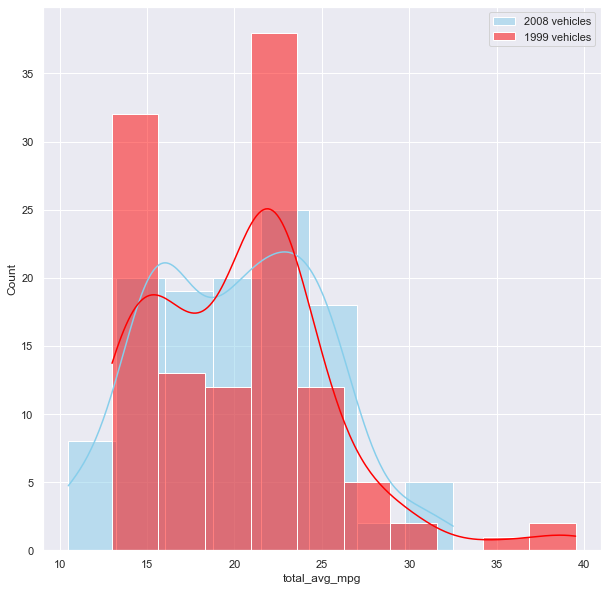

In [736]:
alpha = 0.05

mpg_1999_sample = mpg_db[mpg_db.year == 1999].total_avg_mpg
mpg_2008_sample = mpg_db[mpg_db.year == 2008].total_avg_mpg

plt.figure(figsize=(10, 10))

sns.histplot(data=mpg_2008_sample, color="skyblue", label="2008 vehicles", kde=True)
sns.histplot(data=mpg_1999_sample, color="red", label="1999 vehicles", kde=True)

plt.legend()

In [737]:
t_score, p_value = stats.ttest_ind(mpg_1999_sample, mpg_2008_sample, equal_var=False)

In [738]:
if (p_value < alpha):
    print("REJECT the Null Hypothesis. There IS a fuel-efficiency difference in vehicles made in 2008 and 1999.")
else:
    print("CANNOT reject the Null Hypothesis. Vehicles made in 2008 and 1999 appear to have similar fuel-efficiency")

CANNOT reject the Null Hypothesis. Vehicles made in 2008 and 1999 appear to have similar fuel-efficiency


In [739]:
p_value 

0.8263750772060638

----
###  MPG Dataset Question #2: Are compact cars more fuel-efficient than the average car?

**$H_0$:** 
- "Compact Car fuel-efficiency is <= the Average Car fuel-effiency."

**$H_a$:**
- "Compact Car fuel-effiency is > the Average Car fuel-effiency."

**Paremeters:**

fuel-efficiency: 
- higher total average mpg

**compact cars:**
- Includes "compact" and "subcompact" class vehicles in the dataset

**average cars:** 
- NOT compact (all other cars in population excluding compact, and subcompact cars)


$\alpha$ = 0.05

----

In [740]:
alpha = 0.05

In [741]:
mpg_db['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [742]:
# for comparison to population mean -- creating a series with just compact car total avg mpg
compact_sample = mpg_db[(mpg_db['class'] == "compact") | (mpg_db['class'] == "subcompact")].total_avg_mpg
compact_sample
# compact_mean = round(compact_sample['total_avg_mpg'].mean(), 2)
#  24.21 total mpg mean

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
91     22.0
92     21.5
93     21.5
94     20.0
95     18.0
96     18.5
97     19.0
98     18.5
99     17.0
100    30.5
101    28.0
102    28.5
103    26.0
104    28.0
105    30.0
106    30.5
107    30.0
108    25.0
116    22.5
117    24.0
118    24.0
119    23.5
120    20.5
121    20.0
122    20.5
142    25.0
143    23.0
166    23.5
167    22.5
168    22.5
169    22.5
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
222    39.5
223    35.0
224    25.0
225    22.5
226    24.0
227    24.5
Name: total_avg_

In [743]:
# compact_std = round(compact_sample['total_avg_mpg'].std(), 2)
# 3.53 standard deviation

In [744]:
# calculating the compact sample size
len(compact_sample) # 82 records/oberservations, which should be enough for our t_test comparison

82

In [745]:
# math.sqrt(compact_std) # checking the variance -- which checks out

In [746]:
# calculating the mean, and standard deviation for cars other than compact
average_sample = mpg_db[(mpg_db['class'] != "compact") & (mpg_db['class'] != "subcompact")]
average_sample['class'].unique()

array(['midsize', 'suv', '2seater', 'minivan', 'pickup'], dtype=object)

In [747]:
# converting df to series with just total_avg_mpg for non-compact vehicles

average_sample = average_sample.total_avg_mpg

In [748]:
average_sample.count() # 152 observations in sample

152

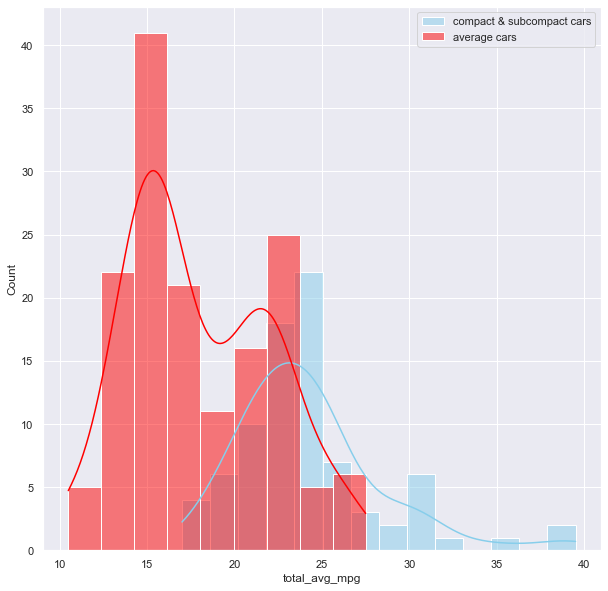

In [749]:
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(10, 10))

sns.histplot(data=compact_sample, color="skyblue", label="compact & subcompact cars", kde=True)
sns.histplot(data=average_sample, color="red", label="average cars", kde=True)

plt.legend()

In [750]:
# next, i want to calculate the mean, and standard deviation for the average car sample

# average_mean = round(average_sample['total_avg_mpg'].mean(), 2)
# 17.95 total mpg mean

# average_std = round(average_sample['total_avg_mpg'].std(), 2)
# 4.02 standard deviation

In [751]:
# calculating the sample size
# len(average_sample) # 152 records or observations, which should be enough for our t_test comparison

In [752]:
t_score, p_value = stats.ttest_ind(compact_sample, average_sample, equal_var=False)

if (p_value/2) < alpha and t_score > 0: 
    print(f"REJECT the Null Hypothesis. Compact Cars sample have GREATER fuel-efficiency that the average cars sample.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. Compact Cars sample have GREATER fuel-efficiency that the average cars sample.


----
###  MPG Dataset Question #3. Do manual cars get better gas mileage than automatic cars?

- 2 sample t-test (manual and automatic car samples)
- 1 tailed test (manual cars fuel-efficiency > automatic cars fuel-efficiency)

#### Assumptions & Hypothesis Generation

**Assumptions**

- large enough sample sizes?

- different variances?

- independent variables? 
  - True

**$H_0$:**

  - Manual cars get just as or WORSE (<=) gas mileage that automatic vehicles."

**$H_a$:**
  - Manual cars get BETTER (>) gas mileage than automatic vehicles."


##### Where "gas mileage" is measured by...

- "total average miles per gallon", or an "average of both city and highway miles combined." 

$\alpha$: 0.05 (95% confidence)

-----

In [753]:
alpha = 0.05

In [754]:
mpg_db.head()

,manufacturer,year,model,cty,hwy,total_avg_mpg,displ,cyl,trans,drv,fl,class
1,audi,1999,a4,18,29,23.5,1.8,4,auto(l5),f,p,compact
2,audi,1999,a4,21,29,25.0,1.8,4,manual(m5),f,p,compact
3,audi,2008,a4,20,31,25.5,2.0,4,manual(m6),f,p,compact
4,audi,2008,a4,21,30,25.5,2.0,4,auto(av),f,p,compact
5,audi,1999,a4,16,26,21.0,2.8,6,auto(l5),f,p,compact


In [755]:
mpg_db.dtypes

manufacturer      object
year               int64
model             object
cty                int64
hwy                int64
total_avg_mpg    float64
displ            float64
cyl                int64
trans             object
drv               object
fl                object
class             object
dtype: object

In [756]:
# since there are varying manual and automatic string values, i will need to do a form of string matching or sorting to extract 

sorted(mpg_db.trans.unique())

['auto(av)',
 'auto(l3)',
 'auto(l4)',
 'auto(l5)',
 'auto(l6)',
 'auto(s4)',
 'auto(s5)',
 'auto(s6)',
 'manual(m5)',
 'manual(m6)']

In [757]:
# let's see if i can now match manual and automatic transmission into respective dataframes / samples

manual_sample = mpg_db[(mpg_db['trans'] == "manual(m5)") | (mpg_db['trans'] == "manual(m6)")]
manual_sample.trans.unique() # checks out!

array(['manual(m5)', 'manual(m6)'], dtype=object)

In [758]:
# can now convert dataframe to series with just total_avg_mpg

manual_sample = manual_sample.total_avg_mpg

In [759]:
manual_sample.count() # 77 observations total

77

In [760]:
# will do the same for automatic transmission sample

automatic_sample = mpg_db[(mpg_db['trans'] != "manual(m5)") & (mpg_db['trans'] != "manual(m6)")]
automatic_sample.trans.unique() # this too checks out!

array(['auto(l5)', 'auto(av)', 'auto(s6)', 'auto(l4)', 'auto(l3)',
       'auto(l6)', 'auto(s5)', 'auto(s4)'], dtype=object)

In [761]:
# can now convert dataframe into series with just total_avg_mpg

automatic_sample = automatic_sample.total_avg_mpg

In [762]:
automatic_sample.count() # 157 total observations

157

In [763]:
# quick summary statistics for both samples

print("manual_sample mean:", round(manual_sample.mean(), 2))
print("manual_sample variance:", round(manual_sample.var(), 2))
print("manual_sample std deviation:", round(manual_sample.std(), 2), "\n")

print("automatic_sample mean:", round(automatic_sample.mean(), 2))
print("automatic_sample variance:", round(automatic_sample.var(), 2))
print("automatic_sample std deviation:", round(automatic_sample.std(), 2))

manual_sample mean: 22.23
manual_sample variance: 26.64
manual_sample std deviation: 5.16 

automatic_sample mean: 19.13
automatic_sample variance: 21.94
automatic_sample std deviation: 4.68


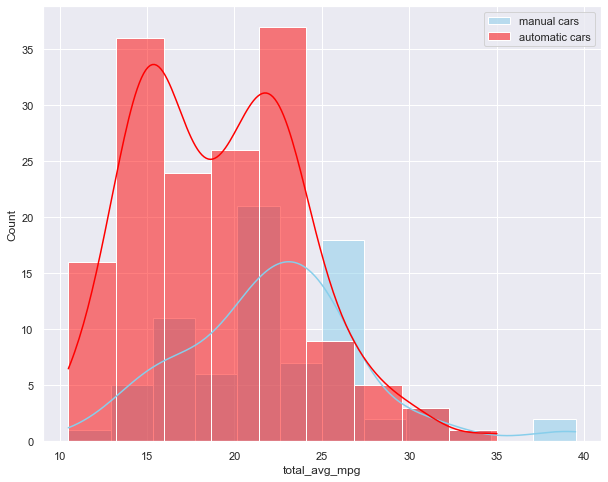

In [764]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))

sns.histplot(data=manual_sample, color="skyblue", label="manual cars", kde=True)
sns.histplot(data=automatic_sample, color="red", label="automatic cars", kde=True)

plt.legend()

In [765]:
# now conduct my 2 sample t-test / 1 tail test...where p_value / 2 & t_score > to calculate one (1) side probability (manual cars getting better gas mileage)

t_score, p_value = stats.ttest_ind(manual_sample, automatic_sample, equal_var=False)

In [766]:
if ((p_value/2) < alpha) and t_score > 0: 
    print(f"REJECT the Null Hypothesis. Cars in the 'manual_sample' get better gas mileage than cars in the 'automatic_sample'.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. Cars in the 'manual_sample' get better gas mileage than cars in the 'automatic_sample'.


----

### Correlation Exercises
    date: Monday, June 27th 2022

#### Use the telco_churn data. 

**Exercise Question #1: Does tenure correlate with monthly charges?**

    - Total charges?
    - What happens if you control for phone and internet service?

In [767]:
telco_df = pd.read_csv("telco_churn.csv")
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [768]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [769]:
# cleaning for "NULL values"

telco_df = telco_df.dropna()

In [770]:
telco_df.shape # (7032, 21)

(7032, 21)

In [771]:
# 1a: Does tenure correlate with monthly charges?

# approach:
# set-up the Null and Alternative Hypothesis
# determine the statistical test to be performed 
# set-up your test assumptions
# define the "alpha" ("confidence level" or accepted level of error in probability)


----
$H_0$:
There is **NOT** a correlation between the number of months a customer is with the company and their total monthly charges.

$H_a$:
There **IS** a correlation between the number of months a customer is with the company and their total monthly charges.

**Assmptions:**

- Independent Variables: True
- Different Variance: 
- Sample Size is Large Enough (> 30 obervations): True


In [772]:
alpha = 0.005

In [773]:
# tenure = numerical: contineous data
# mothly charges = numerical: contineous data
# since both variables are numerical type: contineous data, i can conduct a "Pearson's R" correlation test

x = telco_df.tenure
y = telco_df.MonthlyCharges

Text(0, 0.5, 'Average Monthly Charges')

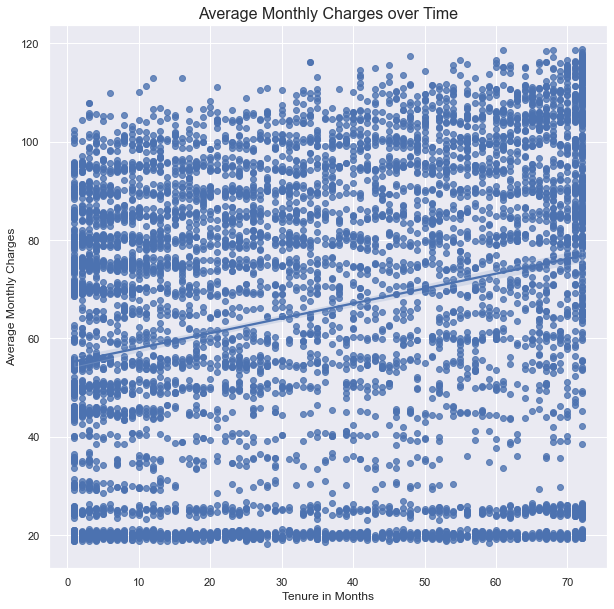

In [774]:
# plotting the variables

plt.figure(figsize= (10, 10))
fig = sns.regplot(x = "tenure", y = "MonthlyCharges", data=telco_df)

fig.set_title("Average Monthly Charges over Time", fontsize=16)
fig.set_xlabel("Tenure in Months", fontsize=12)
fig.set_ylabel("Average Monthly Charges", fontsize=12)

In [775]:
corr, p_value = stats.pearsonr(x, y)
corr, p_value

(0.24686176664089346, 3.9898213232673846e-98)

In [776]:
if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS a correlation between customer tenure and monthly charges.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. There IS a correlation between customer tenure and monthly charges.


In [777]:
# 1b. Does a customer's Tenure correlate with Total charges?

$H_0$:
There is **NOT** a correlation between the number of months a customer is with the company and their total monthly charges.

$H_a$:
There **IS** a correlation between the number of months a customer is with the company and their total charges.

In [778]:
x = telco_df.tenure
y = telco_df.TotalCharges

Text(0, 0.5, 'Total Charges')

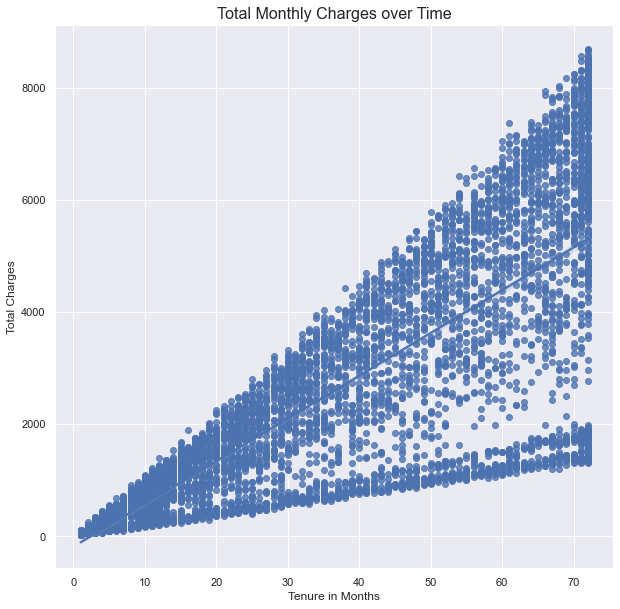

In [779]:
# plotting the variables

plt.figure(figsize= (10, 10))
fig = sns.regplot(x = "tenure", y = "TotalCharges", data=telco_df)

fig.set_title("Total Monthly Charges over Time", fontsize=16)
fig.set_xlabel("Tenure in Months", fontsize=12)
fig.set_ylabel("Total Charges", fontsize=12)

In [780]:
# calculating the correlation and p_value between the two (2) variables:

corr, p_value = stats.pearsonr(x, y)
corr, p_value

(0.825880460933202, 0.0)

In [781]:
if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS a correlation between customer tenure and total charges.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. There IS a correlation between customer tenure and total charges.


In [ ]:
# 1c. controlling for phone service and internet service - 
# determine the correlation between avg. monthly charges and total charges

# parameters/approach:

# by controlling for phone service and internet service we are saying...
# using the previous example - calculate correlation for these (2) "potential" confounding variables (e.g., phone & internet service)

In [784]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# "PhoneService" Correlation

